In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/linkedin-jobs/final_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize']=[15,6]

In [3]:
df = pd.read_csv('/kaggle/input/linkedin-jobs/final_data.csv')
df.head()

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


In [4]:
df.shape

(811, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Company_Name        811 non-null    object
 1   Class               811 non-null    object
 2   Designation         811 non-null    object
 3   Location            811 non-null    object
 4   Total_applicants    811 non-null    int64 
 5   LinkedIn_Followers  811 non-null    int64 
 6   Level               811 non-null    object
 7   Involvement         811 non-null    object
 8   Employee_count      811 non-null    int64 
 9   Industry            811 non-null    object
 10  PYTHON              811 non-null    int64 
 11  C++                 811 non-null    int64 
 12  JAVA                811 non-null    int64 
 13  HADOOP              811 non-null    int64 
 14  SCALA               811 non-null    int64 
 15  FLASK               811 non-null    int64 
 16  PANDAS              811 no

In [6]:
df.nunique()

Company_Name           11
Class                   4
Designation           392
Location               16
Total_applicants      115
LinkedIn_Followers     11
Level                   2
Involvement             4
Employee_count          4
Industry                4
PYTHON                  2
C++                     2
JAVA                    2
HADOOP                  2
SCALA                   2
FLASK                   2
PANDAS                  2
SPARK                   2
NUMPY                   2
PHP                     2
SQL                     2
MYSQL                   2
CSS                     2
MONGODB                 2
NLTK                    2
TENSORFLOW              2
LINUX                   2
RUBY                    2
JAVASCRIPT              2
DJANGO                  2
REACT                   2
REACTJS                 2
AI                      2
UI                      2
TABLEAU                 2
NODEJS                  2
EXCEL                   2
POWER BI                2
SELENIUM    

In [7]:
df.columns

Index(['Company_Name', 'Class', 'Designation', 'Location', 'Total_applicants',
       'LinkedIn_Followers', 'Level', 'Involvement', 'Employee_count',
       'Industry', 'PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML'],
      dtype='object')

In [8]:
df['Company_Name'].unique()

array(['Wipro', 'LTIMindtree', 'IDESLABS PRIVATE LIMITED',
       'Cactus Communications', 'ACURA SOLUTIONS LTD', 'UST',
       'Vodafone Idea Limited', 'Tata Consultancy Services', 'Uplers',
       'Infosys', 'Genpact'], dtype=object)

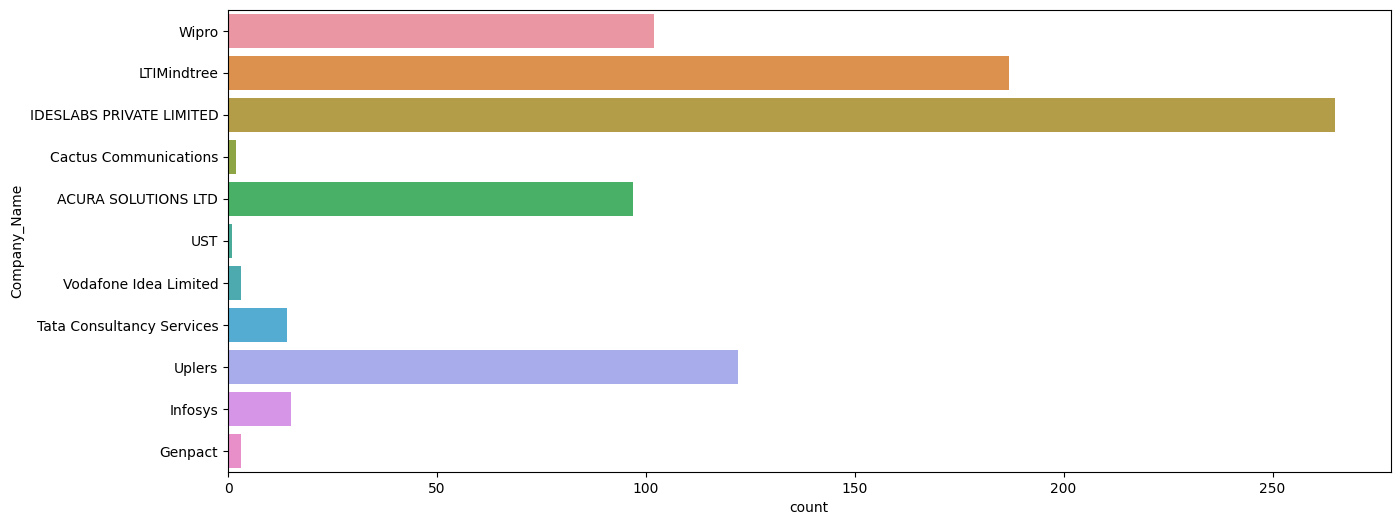

In [9]:
sns.countplot(y='Company_Name',data=df)
plt.show()

In [10]:
df['Class'].unique()

array(['Class 3', 'Class 1', 'Class 4', 'Class 2'], dtype=object)

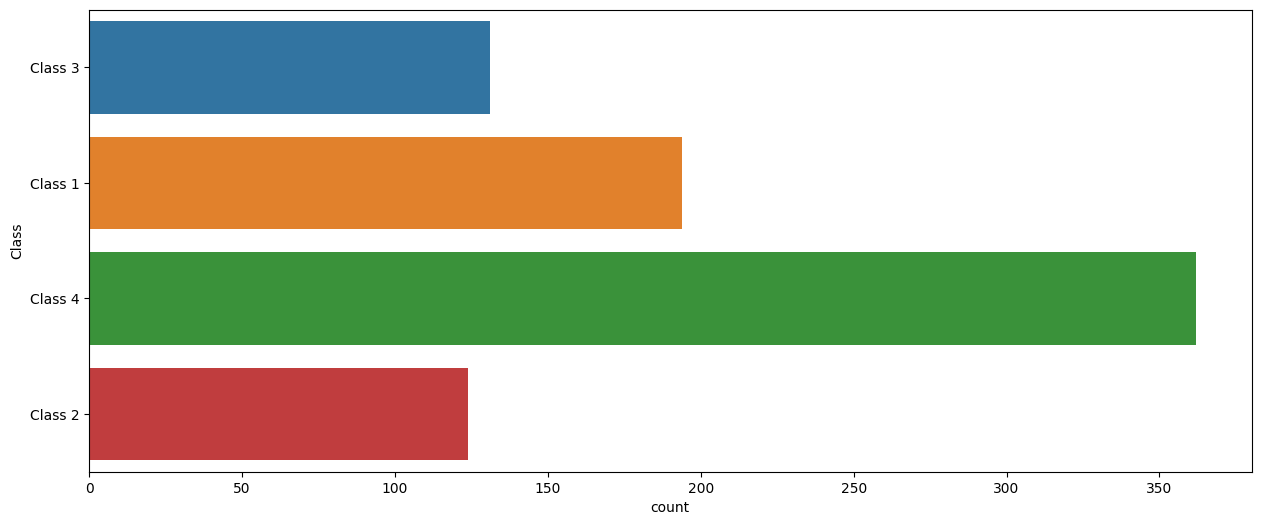

In [11]:
sns.countplot(y='Class',data=df)
plt.show()

In [12]:
df['Location'].value_counts().index

Index([' Maharashtra', ' Telangana', ' Karnataka', ' Tamil Nadu',
       ' Uttar Pradesh', ' Delhi', ' Haryana', ' West Bengal', ' Rajasthan',
       ' Gujarat', ' Kerala', ' Odisha', ' India', ' Madhya Pradesh',
       ' Andhra Pradesh', ' Punjab'],
      dtype='object', name='Location')

In [13]:
loc = ['Maharashtra', 'Telangana', 'Karnataka', 'Tamil Nadu',
       'Uttar Pradesh', 'Delhi', 'Haryana', 'West Bengal', 'Rajasthan',
       'Gujarat', 'Kerala', 'Odisha', 'India', 'Madhya Pradesh','Andhra Pradesh', 'Punjab']

In [14]:
df['Location'] = df['Location'].replace(dict(zip(df['Location'].value_counts().index,loc)))
df.head()

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


In [15]:
df['Location'].unique()

array(['Maharashtra', 'Delhi', 'Telangana', 'Karnataka', 'Haryana',
       'Tamil Nadu', 'Uttar Pradesh', 'West Bengal', 'Kerala',
       'Madhya Pradesh', 'Odisha', 'Andhra Pradesh', 'Rajasthan', 'India',
       'Gujarat', 'Punjab'], dtype=object)

In [16]:
df[df['Location']=='Maharashtra']

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
7,Wipro,Class 3,Test Engineer,Maharashtra,158,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
8,Wipro,Class 3,Administrator,Maharashtra,11,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
9,Wipro,Class 3,Administrator,Maharashtra,47,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786,Uplers,Class 2,Google Analytics Associate - WFH,Maharashtra,84,793022,Full-time,Mid-Senior level,5000,IT Services and IT Consulting,...,0,1,1,0,0,0,1,0,1,1
790,Uplers,Class 2,Data Engineer,Maharashtra,41,793022,Full-time,Mid-Senior level,5000,IT Services and IT Consulting,...,0,1,1,0,0,0,0,0,0,0
791,Uplers,Class 2,Remote Android Developer,Maharashtra,9,793022,Full-time,Mid-Senior level,5000,IT Services and IT Consulting,...,0,1,1,0,0,0,0,0,0,0
803,Infosys,Class 3,Nodejs Lead,Maharashtra,69,6790011,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,1,0,0,0,0,0


In [17]:
df.columns

Index(['Company_Name', 'Class', 'Designation', 'Location', 'Total_applicants',
       'LinkedIn_Followers', 'Level', 'Involvement', 'Employee_count',
       'Industry', 'PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML'],
      dtype='object')

In [18]:
skills = df[['PYTHON', 'C++', 'JAVA', 'HADOOP', 'SCALA', 'FLASK',
       'PANDAS', 'SPARK', 'NUMPY', 'PHP', 'SQL', 'MYSQL', 'CSS', 'MONGODB',
       'NLTK', 'TENSORFLOW', 'LINUX', 'RUBY', 'JAVASCRIPT', 'DJANGO', 'REACT',
       'REACTJS', 'AI', 'UI', 'TABLEAU', 'NODEJS', 'EXCEL', 'POWER BI',
       'SELENIUM', 'HTML', 'ML']]

In [19]:
len(skills.columns)

31

In [20]:
sk=[]
for i in skills.columns:
    sk.append(skills[i].value_counts()[1])

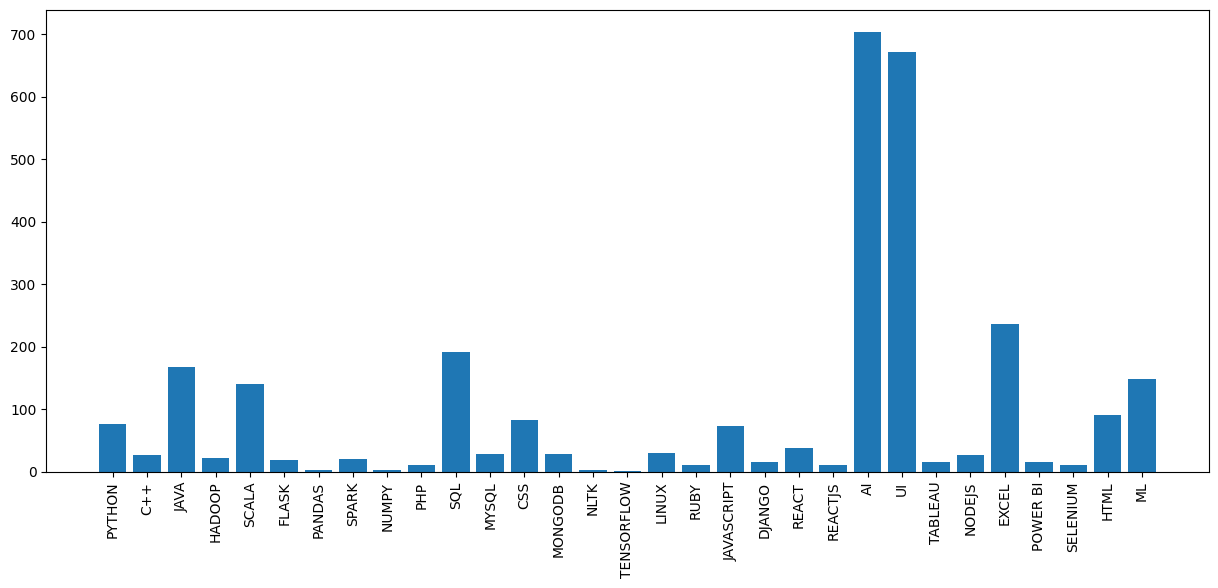

In [21]:
plt.bar(skills.columns,sk)
plt.xticks(rotation=90)
plt.show()

In [22]:
df.head()

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


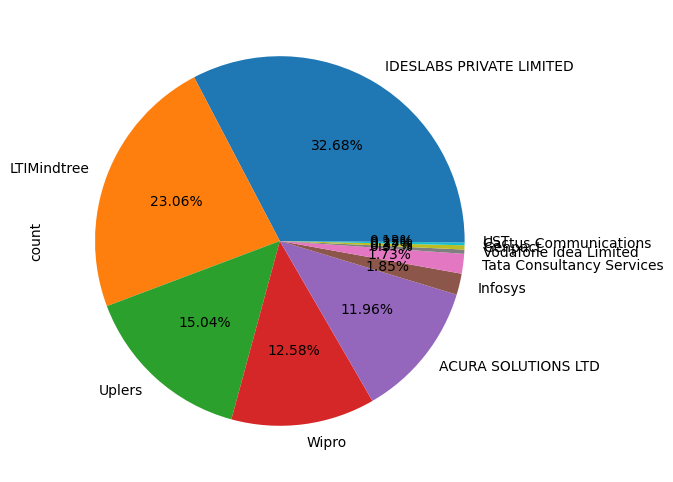

In [23]:
df['Company_Name'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

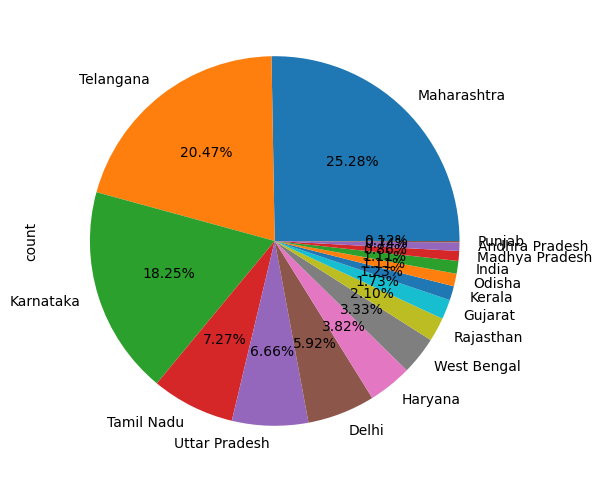

In [24]:
df['Location'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

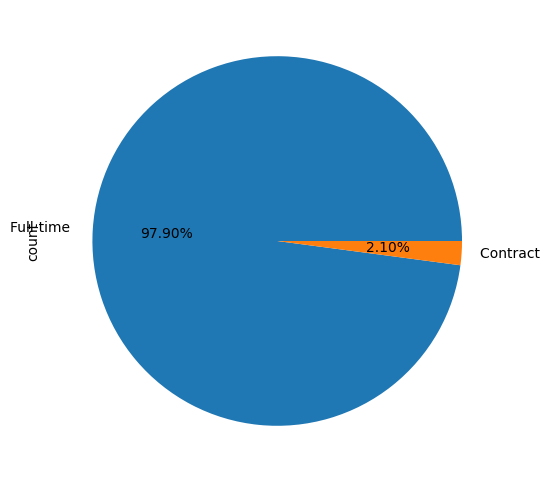

In [25]:
df['Level'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

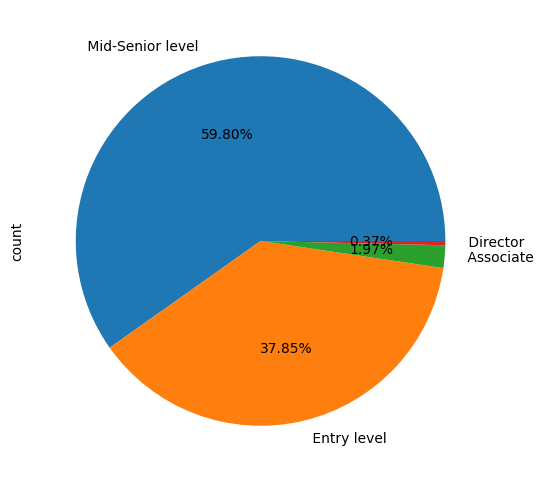

In [26]:
df['Involvement'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

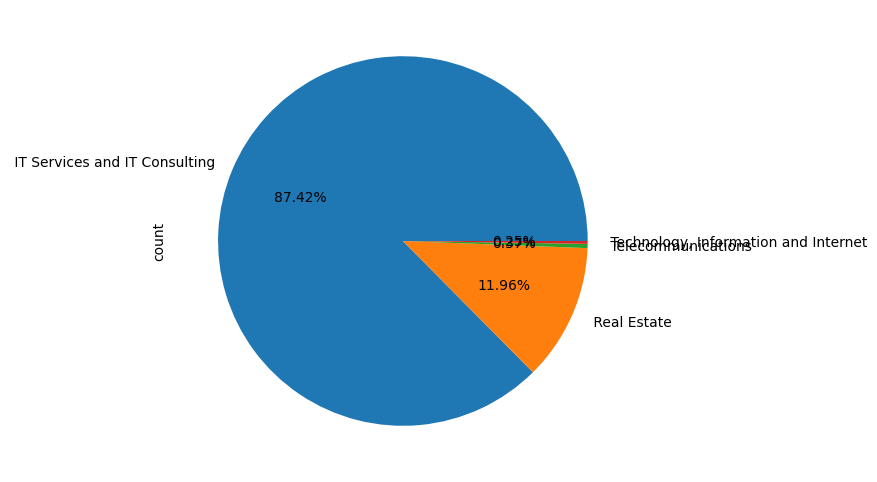

In [27]:
df['Industry'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

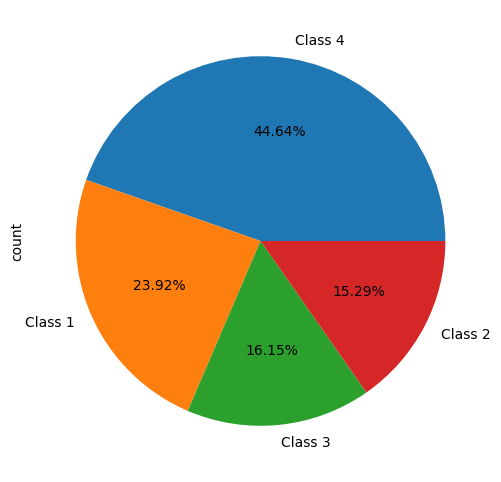

In [28]:
df['Class'].value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.show()

In [29]:
df.head()

,Company_Name,Class,Designation,Location,Total_applicants,LinkedIn_Followers,Level,Involvement,Employee_count,Industry,...,REACTJS,AI,UI,TABLEAU,NODEJS,EXCEL,POWER BI,SELENIUM,HTML,ML
0,Wipro,Class 3,Project Manager,Maharashtra,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
1,Wipro,Class 3,Project Manager,Delhi,121,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
2,Wipro,Class 3,Project Manager,Delhi,0,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1
3,Wipro,Class 3,Administrator,Telangana,0,6737300,Full-time,Mid-Senior level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,0
4,Wipro,Class 3,Project Manager,Maharashtra,119,6737300,Full-time,Entry level,10001,IT Services and IT Consulting,...,0,1,1,0,0,1,0,0,0,1


<Axes: ylabel='Company_Name'>

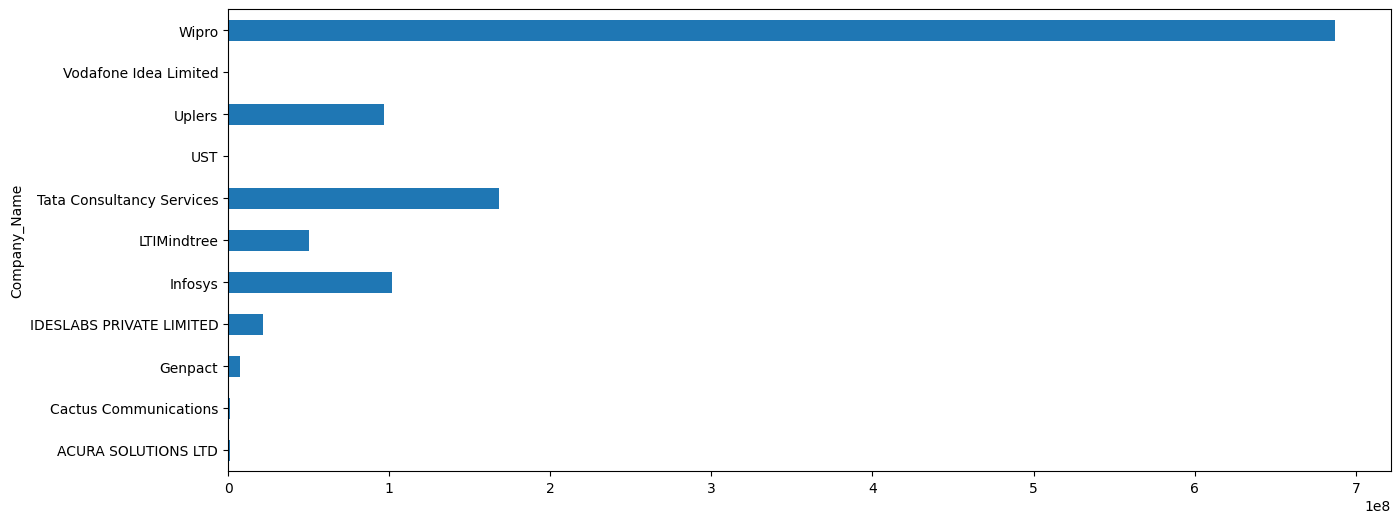

In [30]:
df.groupby('Company_Name')['LinkedIn_Followers'].sum().plot(kind='barh')

<Axes: ylabel='Involvement'>

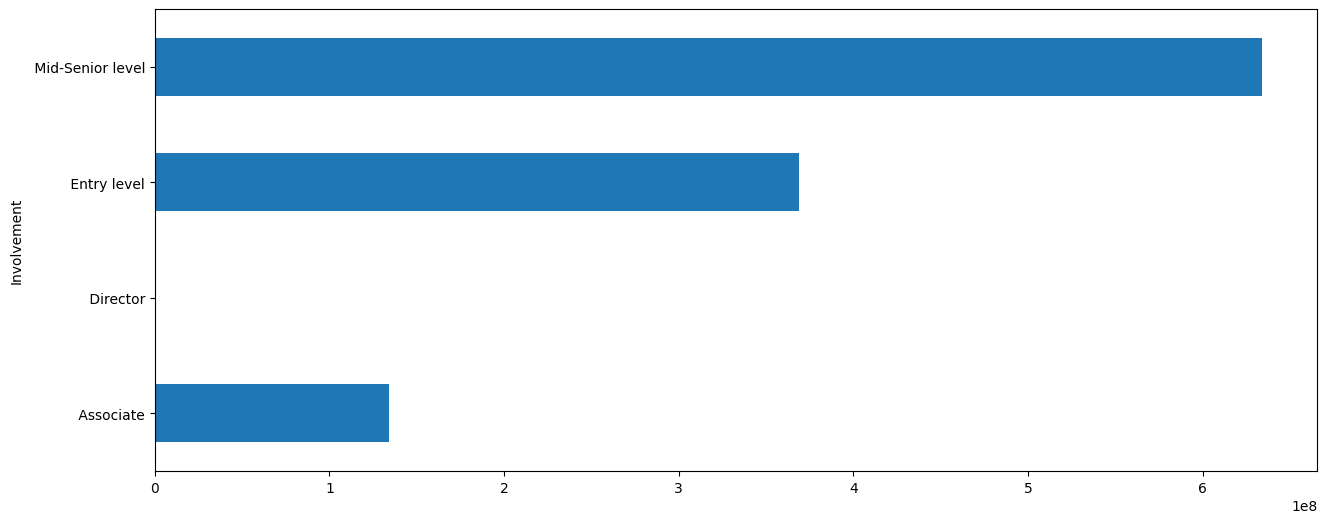

In [31]:
df.groupby('Involvement')['LinkedIn_Followers'].sum().plot(kind='barh')

<Axes: ylabel='Industry'>

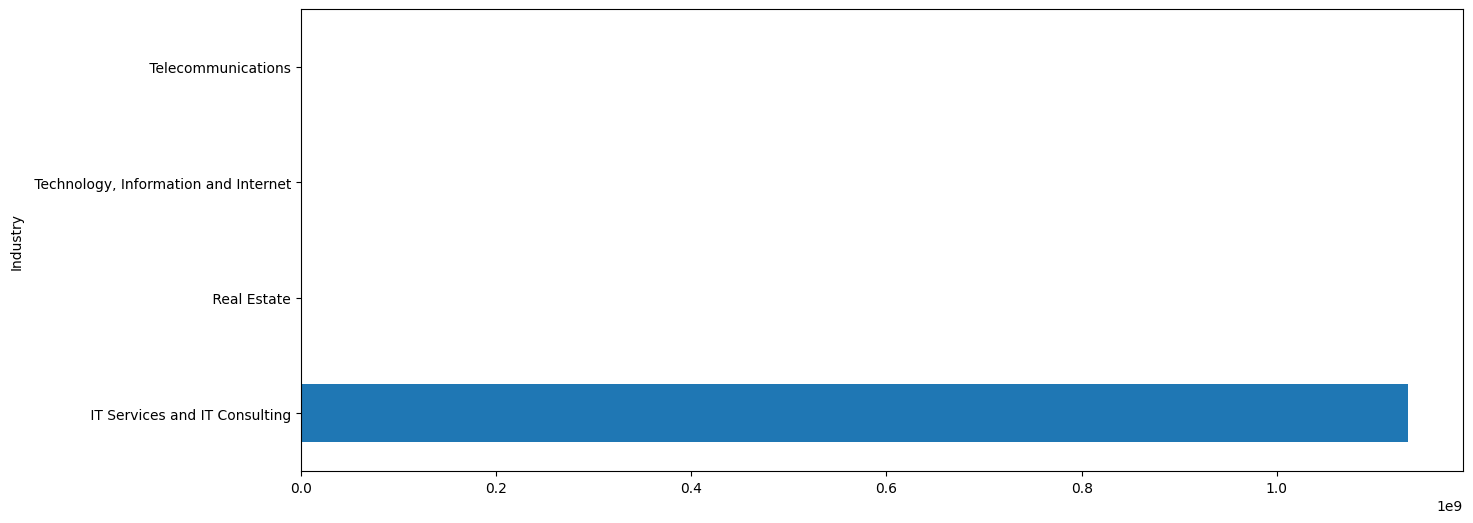

In [32]:
df.groupby('Industry')['LinkedIn_Followers'].sum().plot(kind='barh')